# Part I: Classical Machine Learning on Tabular Data

This part focuses on supervised learning using a structured CSV dataset, where several classical machine learning models—including Logistic Regression, MLP, Decision Trees, and XGBoost—are trained as baseline methods. Their performance is then compared against Support Vector Machines (SVM) to evaluate the effectiveness of SVM relative to other approaches under a unified preprocessing and evaluation framework.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import xgboost as xgb

## Load Dataset

In [ ]:
# Download Titanic Dataset
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

In [ ]:
titanic_data = pd.read_csv("/content/titanic.csv")
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


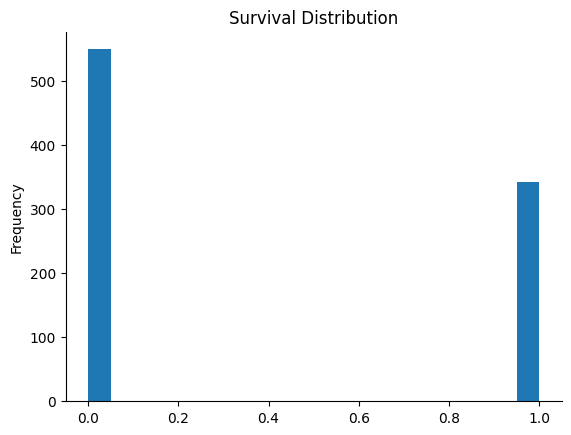

In [ ]:
# Survival distribution
titanic_data["Survived"].plot(
    kind="hist", bins=20, title="Survival Distribution"
)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.show()

## Data Cleaning

In [ ]:
# Drop cabin (mostly missing values)
titanic_data.drop(columns=["Cabin"], inplace=True)

# Remove rows with missing Embarked
titanic_data.dropna(subset=["Embarked"], inplace=True)

# Fill missing Age with mean
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)

## Feature Selection & Encoding

In [ ]:
X = titanic_data[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = titanic_data["Survived"]

# Encode categorical variables
X["Pclass"] = X["Pclass"].replace({1: 0, 2: 1, 3: 2})
X["Sex"] = X["Sex"].replace({"male": 1, "female": 0})
X["Embarked"] = X["Embarked"].replace({"S": 0, "C": 1, "Q": 2})

## Train / Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Models

### Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Logistic Regression Accuracy: 0.775


### MLP

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred):.3f}")

MLP Accuracy: 0.809


### Decision Tree

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Decision Tree Accuracy: 0.78


### XGBoost

In [ ]:
clf = xgb.XGBClassifier(
    max_depth=5, learning_rate=0.01, n_estimators=1000, eval_metric="logloss"
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.3f}")

XGBoost Accuracy: 0.826


## SVM Hyperparameter Experiments

In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
cs = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
degrees = [2, 3, 4, 5, 7]
gammas = [0.1, 0.01]

for kernel in kernels:
    for C in cs:
        if kernel == "linear":
            clf = SVC(kernel=kernel, C=C)
            clf.fit(X_train, y_train)

        elif kernel == "poly":
            for degree in degrees:
                clf = SVC(kernel=kernel, C=C, degree=degree)
                clf.fit(X_train, y_train)
                acc = accuracy_score(y_test, clf.predict(X_test))
                print(f"poly | C={C} | degree={degree} | acc={acc:.3f}")
            continue

        elif kernel == "rbf":
            for gamma in gammas:
                clf = SVC(kernel=kernel, C=C, gamma=gamma)
                clf.fit(X_train, y_train)
                acc = accuracy_score(y_test, clf.predict(X_test))
                print(f"rbf | C={C} | gamma={gamma} | acc={acc:.3f}")
            continue

        elif kernel == "sigmoid":
            clf = SVC(kernel=kernel, C=C)
            clf.fit(X_train, y_train)

        acc = accuracy_score(y_test, clf.predict(X_test))
        print(f"{kernel} | C={C} | acc={acc:.3f}")

linear | C=0.01 | acc=0.770
linear | C=0.1 | acc=0.770
linear | C=0.25 | acc=0.770
linear | C=0.5 | acc=0.770
linear | C=0.75 | acc=0.770
linear | C=1 | acc=0.770
poly | C=0.01 | degree=2 | acc=0.624
poly | C=0.01 | degree=3 | acc=0.652
poly | C=0.01 | degree=4 | acc=0.640
poly | C=0.01 | degree=5 | acc=0.646
poly | C=0.01 | degree=7 | acc=0.652
poly | C=0.1 | degree=2 | acc=0.691
poly | C=0.1 | degree=3 | acc=0.747
poly | C=0.1 | degree=4 | acc=0.685
poly | C=0.1 | degree=5 | acc=0.708
poly | C=0.1 | degree=7 | acc=0.708
poly | C=0.25 | degree=2 | acc=0.736
poly | C=0.25 | degree=3 | acc=0.815
poly | C=0.25 | degree=4 | acc=0.708
poly | C=0.25 | degree=5 | acc=0.708
poly | C=0.25 | degree=7 | acc=0.708
poly | C=0.5 | degree=2 | acc=0.803
poly | C=0.5 | degree=3 | acc=0.815
poly | C=0.5 | degree=4 | acc=0.725
poly | C=0.5 | degree=5 | acc=0.713
poly | C=0.5 | degree=7 | acc=0.702
poly | C=0.75 | degree=2 | acc=0.775
poly | C=0.75 | degree=3 | acc=0.809
poly | C=0.75 | degree=4 | acc=0.

### Best Model Evaluation

In [ ]:
best_clf = SVC(kernel="poly", C=0.25, degree=3)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.815
F1 Score: 0.708
Recall: 0.588


### Confusion Matrix

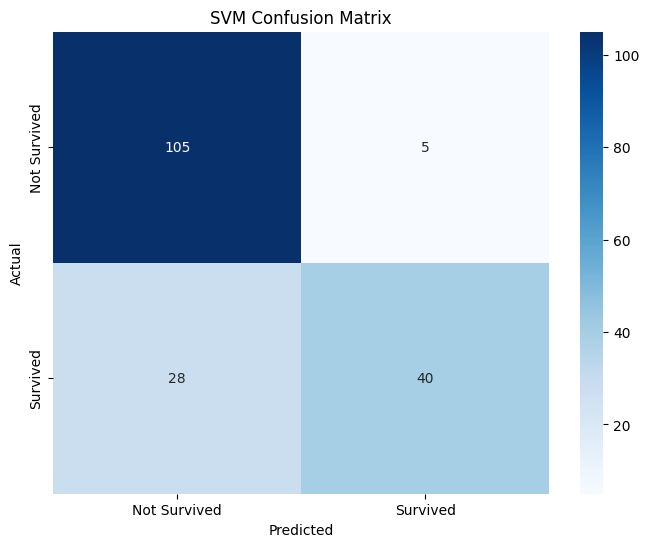

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# Part II: Image Data Comparison of SVM and a Simple CNN

This part focuses on binary image classification using image data, where a simple convolutional neural network (CNN) is trained to learn features directly from raw images. Its performance is compared with Support Vector Machine (SVM) models applied to image data to evaluate the effectiveness of deep learning–based feature extraction versus a traditional SVM approach on the same classification task.

## Imports

In [ ]:
import os
import random
import zipfile
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Extract Dataset

In [ ]:
!gdown 1wM2RTBVctlmOcXJntBK9BwRgwQFW1HtC

In [ ]:
zip_path = "cat_dog_2.zip"

with zipfile.ZipFile(zip_path, "r") as zip_file:
    zip_file.extractall("./")

## Visualize Sample Images

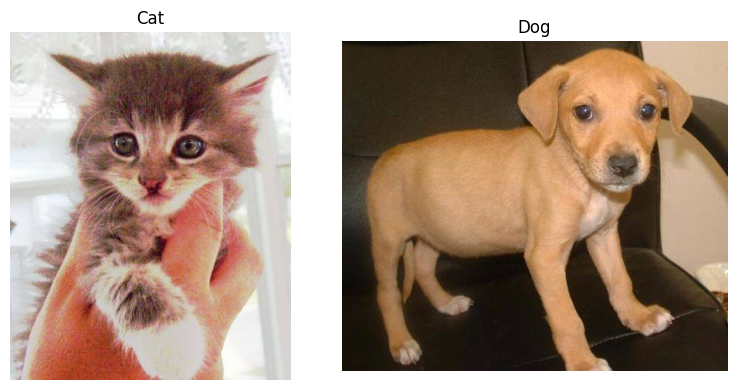

In [ ]:
cat_img = cv.imread("/content/cat_dog_2/training_set/cat/cat.100.jpg")
dog_img = cv.imread("/content/cat_dog_2/training_set/dog/dog.117.jpg")

cat_img_rgb = cv.cvtColor(cat_img, cv.COLOR_BGR2RGB)
dog_img_rgb = cv.cvtColor(dog_img, cv.COLOR_BGR2RGB)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(cat_img_rgb)
axes[0].set_title("Cat")
axes[0].axis("off")

axes[1].imshow(dog_img_rgb)
axes[1].set_title("Dog")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## Utility Functions

In [ ]:
def collect_image_paths(base_path):
    """Collect sorted image paths from cat and dog folders."""
    cats = [os.path.join(base_path, "cat", f) for f in sorted(os.listdir(os.path.join(base_path, "cat")))]
    dogs = [os.path.join(base_path, "dog", f) for f in sorted(os.listdir(os.path.join(base_path, "dog")))]
    return cats + dogs

def preprocess_images(paths, img_size=(64, 64)):
    """
    Read images, resize, convert to grayscale,
    flatten them, and extract labels.
    """
    images, labels = [], []

    for path in paths:
        img = cv.imread(path)
        img = cv.resize(img, img_size)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        images.append(img.flatten())

        # Label assignment: cat = -1, dog = +1
        label = -1 if os.path.basename(path).startswith("c") else 1
        labels.append(label)

    return np.array(images), np.array(labels)


## Load Train / Test Data

In [ ]:
train_paths = collect_image_paths("/content/cat_dog_2/training_set")
test_paths = collect_image_paths("/content/cat_dog_2/test_set")

random.seed(11)
random.shuffle(train_paths)

X_train_raw, y_train = preprocess_images(train_paths)
X_test_raw, y_test = preprocess_images(test_paths)

print("Train samples:", len(y_train))
print("Test samples:", len(y_test))

Train samples: 4000
Test samples: 1000


## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

## SVM Models

### Linear SVM

In [ ]:
linear_svm = SVC(kernel="linear")
linear_svm.fit(X_train, y_train)

print(f"Linear SVM training accuracy: {linear_svm.score(X_train, y_train):.3f}")
print(f"Linear SVM test accuracy: {linear_svm.score(X_test, y_test):.3f}")

Linear SVM training accuracy: 1.000
Linear SVM test accuracy: 0.525


### Polynomial & RBF SVMs

In [ ]:
Cs = [1, 0.75, 0.5, 0.25, 0.1, 0.01]
degrees = [2, 3, 4, 5]

for C in Cs:
    for degree in degrees:
        poly_svm = SVC(kernel="poly", C=C, degree=degree)
        poly_svm.fit(X_train, y_train)
        print(
            f"Poly | C={C}, degree={degree} | "
            f"train={poly_svm.score(X_train, y_train):.3f}, "
            f"test={poly_svm.score(X_test, y_test):.3f}"
        )

    rbf_svm = SVC(kernel="rbf", C=C)
    rbf_svm.fit(X_train, y_train)
    print(
        f"RBF | C={C} | "
        f"train={rbf_svm.score(X_train, y_train):.3f}, "
        f"test={rbf_svm.score(X_test, y_test):.3f}"
    )

Poly | C=1, degree=2 | train=0.803, test=0.590
Poly | C=1, degree=3 | train=0.913, test=0.569
Poly | C=1, degree=4 | train=0.810, test=0.563
Poly | C=1, degree=5 | train=0.846, test=0.542
RBF | C=1 | train=0.865, test=0.623
Poly | C=0.75, degree=2 | train=0.771, test=0.585
Poly | C=0.75, degree=3 | train=0.888, test=0.563
Poly | C=0.75, degree=4 | train=0.786, test=0.558
Poly | C=0.75, degree=5 | train=0.825, test=0.537
RBF | C=0.75 | train=0.824, test=0.621
Poly | C=0.5, degree=2 | train=0.731, test=0.583
Poly | C=0.5, degree=3 | train=0.847, test=0.564
Poly | C=0.5, degree=4 | train=0.749, test=0.554
Poly | C=0.5, degree=5 | train=0.797, test=0.532
RBF | C=0.5 | train=0.774, test=0.618
Poly | C=0.25, degree=2 | train=0.679, test=0.579
Poly | C=0.25, degree=3 | train=0.773, test=0.569
Poly | C=0.25, degree=4 | train=0.682, test=0.551
Poly | C=0.25, degree=5 | train=0.753, test=0.525
RBF | C=0.25 | train=0.709, test=0.624
Poly | C=0.1, degree=2 | train=0.619, test=0.574
Poly | C=0.1, d

The best-performing setting is the RBF kernel with C = 0.25, which achieves the highest test accuracy of 0.624 while maintaining a reasonable training accuracy (0.709). Overall, RBF kernels consistently outperform polynomial kernels across different C values, indicating better generalization on the test set.

## CNN Baseline

In [ ]:
train_gen = ImageDataGenerator(rescale=1.0 / 255)
test_gen = ImageDataGenerator(rescale=1.0 / 255)

train_dataset = train_gen.flow_from_directory(
    "cat_dog_2/training_set",
    target_size=(64, 64),
    batch_size=8,
    class_mode="categorical",
    shuffle=True,
)

test_dataset = test_gen.flow_from_directory(
    "cat_dog_2/test_set",
    target_size=(64, 64),
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
cnn_model = keras.Sequential([
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(560, activation="relu"),
    Dense(560, activation="relu"),
    Dense(2, activation="softmax"),
])

In [ ]:
cnn_model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_cnn = cnn_model.fit(
    train_dataset,
    epochs=30,
    verbose=1
)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9467 - loss: 0.1379
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9773 - loss: 0.0673
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9864 - loss: 0.0479
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9800 - loss: 0.0634
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9848 - loss: 0.0427
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9863 - loss: 0.0524
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9898 - loss: 0.0327
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9834 - loss: 0.0501
Epoch 9/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9791 - loss: 0.0675
Epoch 10/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9782 - loss: 0.0608
Epoch 11/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9899 - loss: 0.0197
Epoch 12/30
500/500 ━━━━━━━━━━━━━━━━━━━━

### CNN Evaluation on Test Set

In [ ]:
# Predict class probabilities
predictions = cnn_model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_dataset.classes

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
test_acc = accuracy_score(y_true, y_pred)
print(f"CNN Test Accuracy: {test_acc:.3f}")

CNN Test Accuracy: 0.701


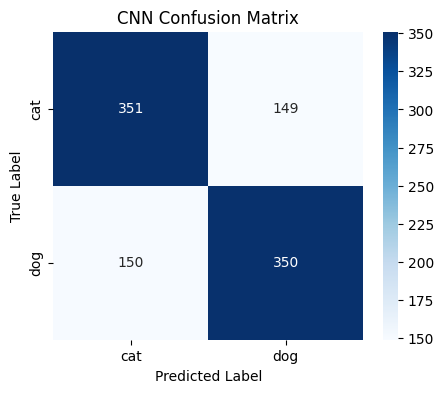

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_dataset.class_indices.keys(),
    yticklabels=test_dataset.class_indices.keys()
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Confusion Matrix")
plt.show()

### Training Curves

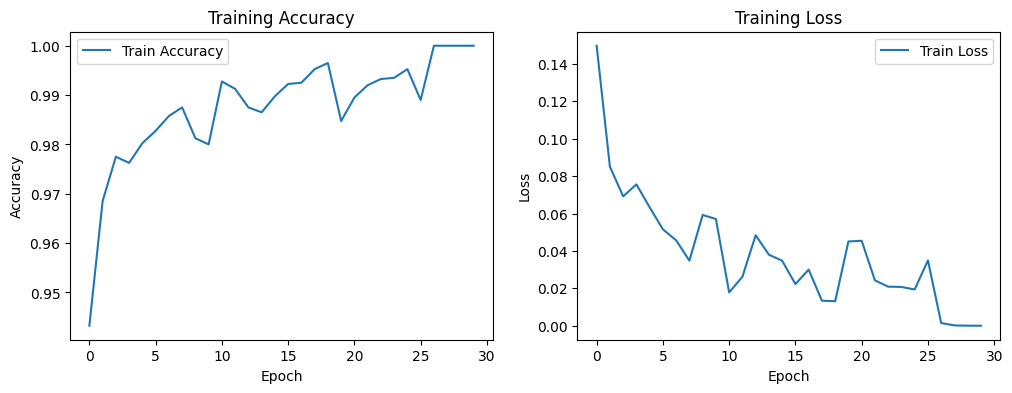

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history["accuracy"], label="Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history["loss"], label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()